In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ppo_metagrid import make_train

In [3]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [4]:
if __name__ == "__main__":
    config = {
        "LR": 2.5e-4,
        "NUM_ENVS": 16*4,
        "NUM_STEPS": 128,
        "TOTAL_TIMESTEPS": 16*5e5,
        "UPDATE_EPOCHS": 4,
        "NUM_MINIBATCHES": 4,
        "GAMMA": 0.99,
        "GAE_LAMBDA": 0.95,
        "CLIP_EPS": 0.2,
        "ENT_COEF": 0.01,
        "VF_COEF": 0.5,
        "MAX_GRAD_NORM": 0.5,
        "ACTIVATION": "tanh",
        "ENV_NAME": "CartPole-v1",
        "ANNEAL_LR": False,
        "DEBUG": True,
    }
    rng = jax.random.PRNGKey(30)
    train_fn = jax.jit(jax.vmap(make_train(config)))
    rng, *_rng = jax.random.split(rng, 1 + 32)
    out = train_fn(jnp.arange(len(_rng)), jnp.stack(_rng))
    metrics = out["metrics"]
    print(jax.tree_map(lambda x: x.shape, metrics))
    # rets = metrics["returned_episode_returns"]  # n_seed, n_iters, n_steps, n_envs
    # import matplotlib.pyplot as plt
    # 
    # n_iters = rets.shape[1]
    # steps = jnp.arange(n_iters) * config["NUM_STEPS"] * config["NUM_ENVS"]
    # plt.plot(steps, jnp.mean(rets, axis=(0, 2, 3)), label='mean')
    # plt.plot(steps, jnp.median(rets, axis=(0, 2, 3)), label='median')
    # plt.plot(steps, jnp.mean(rets, axis=(2, 3)).T, c='gray', alpha=0.1)
    # plt.legend()
    # plt.ylabel('Return')
    # plt.xlabel('Env Steps')
    # plt.show()
    # 
    # plt.plot(jnp.mean(rets[:, :10, :, :], axis=(0, 1, 3)), label='start of training')
    # plt.plot(jnp.mean(rets[:, -10:, :, :], axis=(0, 1, 3)), label='end of training')
    # plt.legend()
    # plt.xlabel('in context steps')
    # plt.show()
    

2023-10-23 12:22:49.770138: W external/xla/xla/service/gpu/nvptx_compiler.cc:673] The NVIDIA driver's CUDA version is 12.1 which is older than the ptxas CUDA version (12.3.52). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


8192
16384
24576
32768
40960
49152
57344
65536
73728
81920
90112
98304
106496
114688
122880
131072
139264
147456
155648
163840
172032
180224
188416
196608
204800
212992
221184
229376
237568
245760
253952
262144
270336
278528
286720
294912
303104
311296
319488
327680
335872
344064
352256
360448
368640
376832
385024
393216
401408
409600
417792
425984
434176
442368
450560
458752
466944
475136
483328
491520
499712
507904
516096
524288
532480
540672
548864
557056
565248
573440
581632
589824
598016
606208
614400
622592
630784
638976
647168
655360
663552
671744
679936
688128
696320
704512
712704
720896
729088
737280
745472
753664
761856
770048
778240
786432
794624
802816
811008
819200
827392
835584
843776
851968
860160
868352
876544
884736
892928
901120
909312
917504
925696
933888
942080
950272
958464
966656
974848
983040
991232
999424
1007616
1015808
1024000
1032192
1040384
1048576
1056768
1064960
1073152
1081344
1089536
1097728
1105920
1114112
1122304
1130496
1138688
1146880
1155072
1163264

In [5]:
rews = metrics  # seed, iter, step, env
rets = rews.sum(axis=2)  # seed, iter, env
rews.shape, rets.shape

((32, 976, 128, 64), (32, 976, 64))

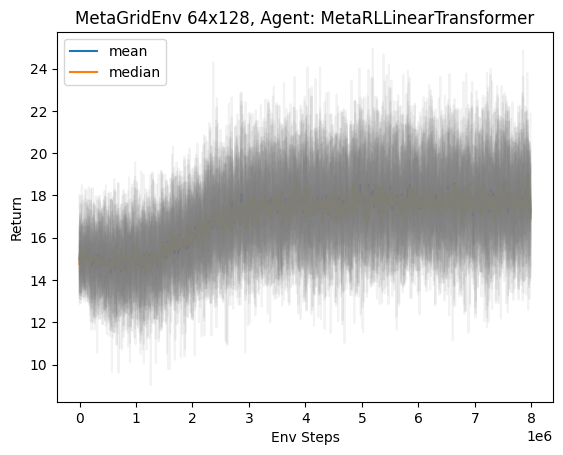

In [6]:
n_iters = rews.shape[1]
iters = jnp.arange(n_iters) * config["NUM_STEPS"] * config["NUM_ENVS"]

plt.plot(iters, jnp.mean(rets.mean(axis=-1), axis=0), label='mean')
plt.plot(iters, jnp.median(rets.mean(axis=-1), axis=0), label='median')
plt.plot(iters, rets.mean(axis=-1).T, c='gray', alpha=0.1)
plt.legend()
plt.ylabel('Return')
plt.xlabel('Env Steps')
plt.title('MetaGridEnv 64x128, Agent: MetaRLLinearTransformer')
plt.show()


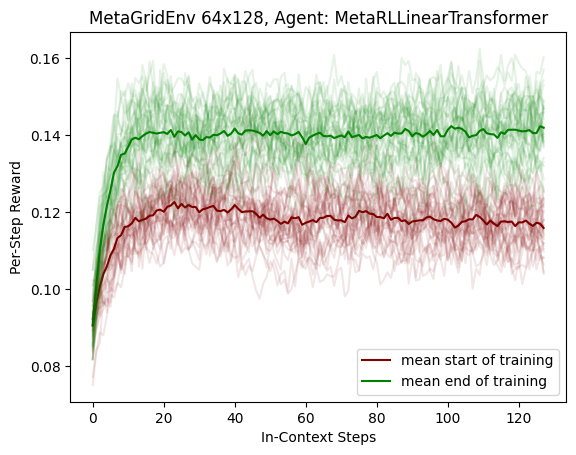

In [7]:
plt.plot(jnp.mean(rews[:, :10].mean(axis=(1, 3)), axis=0), c=[.5, 0, 0, 1], label='mean start of training')
plt.plot(jnp.mean(rews[:, -10:].mean(axis=(1, 3)), axis=0), c=[0, .5, 0, 1], label='mean end of training')

plt.plot(rews[:, :10].mean(axis=(1, 3)).T, c=[.5, 0, 0, .1])
plt.plot(rews[:, -10:].mean(axis=(1, 3)).T, c=[0, .5, 0, .1])

plt.legend()
plt.ylabel('Per-Step Reward')
plt.xlabel('In-Context Steps')
plt.title('MetaGridEnv 64x128, Agent: MetaRLLinearTransformer')
plt.show()
